In [49]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import re
import requests

In [32]:
df = pd.read_csv("netflix_titles.csv").head(20)
df.columns

Index([u'show_id', u'type', u'title', u'director', u'cast', u'country',
       u'date_added', u'release_year', u'rating', u'duration', u'listed_in',
       u'description'],
      dtype='object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 12 columns):
show_id         20 non-null object
type            20 non-null object
title           20 non-null object
director        16 non-null object
cast            19 non-null object
country         19 non-null object
date_added      20 non-null object
release_year    20 non-null int64
rating          20 non-null object
duration        20 non-null object
listed_in       20 non-null object
description     20 non-null object
dtypes: int64(1), object(11)
memory usage: 1.9+ KB


In [38]:
df.head(20)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


In [36]:
#Replace with the mode 
df["country"] = df["country"].fillna(df['country'].mode()[0])
df['country'].isna().sum()

0

In [40]:
df.columns

Index([u'show_id', u'type', u'title', u'director', u'cast', u'country',
       u'date_added', u'release_year', u'rating', u'duration', u'listed_in',
       u'description'],
      dtype='object')

In [46]:
df.isna().sum()

show_id         0
type            0
title           0
director        4
cast            1
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Text(0,0.5,'Number of Movies and TV Shows')

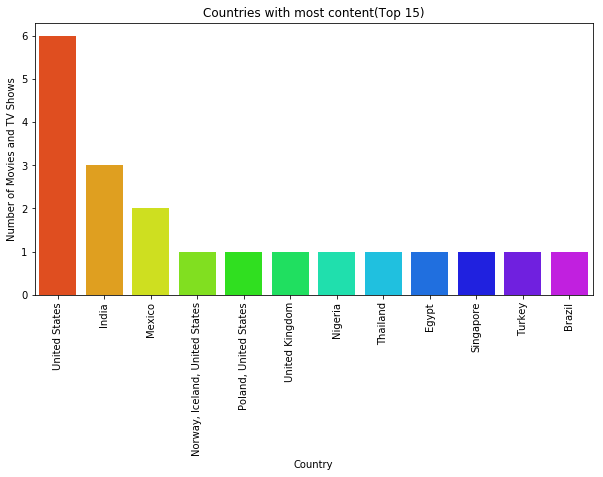

In [60]:
plt.pyplot.figure(figsize = (10,5))
ax = sns.countplot(x= 'country', data= df, palette="gist_rainbow", order= df['country'].value_counts().index[0:15])
plt.pyplot.xlabel("Country")
plt.pyplot.xticks(rotation = 90)
plt.pyplot.title("Countries with most content(Top 15)")
plt.pyplot.ylabel("Number of Movies and TV Shows")